In [65]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from pm4py.objects.conversion.log import converter as log_converter

In [66]:
log_csv = pd.read_csv('ArtificialPatientTreatment.csv')

log_csv

,patient,action,org:resource,DateTime
0,patient 0,First consult,Dr. Anna,2017-01-02 11:40:11
1,patient 0,Blood test,Lab,2017-01-02 12:47:33
2,patient 0,Physical test,Nurse Jesse,2017-01-02 12:53:50
3,patient 0,Second consult,Dr. Anna,2017-01-02 16:21:06
4,patient 0,Surgery,Dr. Charlie,2017-01-05 13:23:09
...,...,...,...,...
685,patient 99,X-ray scan,Team 2,2017-05-25 11:03:27
686,patient 99,Physical test,Nurse Corey,2017-05-25 11:55:24
687,patient 99,Second consult,Dr. Anna,2017-05-29 15:12:39
688,patient 99,Medicine,Pharmacy,2017-05-29 16:17:13


In [67]:
type(log_csv)

pandas.core.frame.DataFrame

In [68]:
log_csv.columns

Index(['patient', ' action', ' org:resource', ' DateTime'], dtype='object')

In [69]:
log_csv[' DateTime'] = pd.to_datetime(log_csv[' DateTime'])

In [70]:
log_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   patient        690 non-null    object        
 1    action        690 non-null    object        
 2    org:resource  690 non-null    object        
 3    DateTime      690 non-null    datetime64[ns]
dtypes: datetime64[ns](1), object(3)
memory usage: 21.7+ KB


In [71]:
case_starts_ends = log_csv.pivot_table(
    index='patient', 
    aggfunc={' DateTime': ['min', 'max']},
)

In [72]:
case_starts_ends

DateTime                    
                           max                 min
patient                                           
patient 0  2017-01-09 08:29:28 2017-01-02 11:40:11
patient 1  2017-01-06 16:49:21 2017-01-02 12:50:35
patient 10 2017-01-30 11:19:19 2017-01-17 14:13:17
patient 11 2017-02-02 10:13:13 2017-01-19 13:35:20
patient 12 2017-01-27 11:18:57 2017-01-20 11:43:38
...                        ...                 ...
patient 95 2017-05-26 10:19:34 2017-05-15 09:15:08
patient 96 2017-05-24 16:38:21 2017-05-15 10:31:45
patient 97 2017-05-22 14:37:56 2017-05-17 08:44:01
patient 98 2017-05-31 14:16:13 2017-05-17 10:56:48
patient 99 2017-05-31 12:46:43 2017-05-18 11:57:11

[100 rows x 2 columns]

In [73]:
case_starts_ends = case_starts_ends.reset_index()
case_starts_ends.columns = ['patient', 'caseend', 'casestart']
log_csv = log_csv.merge(case_starts_ends, on='patient')
log_csv['relativetime'] = log_csv[' DateTime'] - log_csv['casestart']
log_csv['relativetime_s'] = log_csv['relativetime'].dt.seconds + 86400 * \
                            log_csv['relativetime'].dt.days
log_csv['relativedays'] = log_csv['relativetime'].dt.days

log_csv

,patient,action,org:resource,DateTime,caseend,casestart,relativetime,relativetime_s,relativedays
0,patient 0,First consult,Dr. Anna,2017-01-02 11:40:11,2017-01-09 08:29:28,2017-01-02 11:40:11,0 days 00:00:00,0,0
1,patient 0,Blood test,Lab,2017-01-02 12:47:33,2017-01-09 08:29:28,2017-01-02 11:40:11,0 days 01:07:22,4042,0
2,patient 0,Physical test,Nurse Jesse,2017-01-02 12:53:50,2017-01-09 08:29:28,2017-01-02 11:40:11,0 days 01:13:39,4419,0
3,patient 0,Second consult,Dr. Anna,2017-01-02 16:21:06,2017-01-09 08:29:28,2017-01-02 11:40:11,0 days 04:40:55,16855,0
4,patient 0,Surgery,Dr. Charlie,2017-01-05 13:23:09,2017-01-09 08:29:28,2017-01-02 11:40:11,3 days 01:42:58,265378,3
...,...,...,...,...,...,...,...,...,...
685,patient 99,X-ray scan,Team 2,2017-05-25 11:03:27,2017-05-31 12:46:43,2017-05-18 11:57:11,6 days 23:06:16,601576,6
686,patient 99,Physical test,Nurse Corey,2017-05-25 11:55:24,2017-05-31 12:46:43,2017-05-18 11:57:11,6 days 23:58:13,604693,6
687,patient 99,Second consult,Dr. Anna,2017-05-29 15:12:39,2017-05-31 12:46:43,2017-05-18 11:57:11,11 days 03:15:28,962128,11
688,patient 99,Medicine,Pharmacy,2017-05-29 16:17:13,2017-05-31 12:46:43,2017-05-18 11:57:11,11 days 04:20:02,966002,11


In [74]:
log_csv['caselength'] = log_csv['caseend'] - log_csv['casestart']

log_csv

,patient,action,org:resource,DateTime,caseend,casestart,relativetime,relativetime_s,relativedays,caselength
0,patient 0,First consult,Dr. Anna,2017-01-02 11:40:11,2017-01-09 08:29:28,2017-01-02 11:40:11,0 days 00:00:00,0,0,6 days 20:49:17
1,patient 0,Blood test,Lab,2017-01-02 12:47:33,2017-01-09 08:29:28,2017-01-02 11:40:11,0 days 01:07:22,4042,0,6 days 20:49:17
2,patient 0,Physical test,Nurse Jesse,2017-01-02 12:53:50,2017-01-09 08:29:28,2017-01-02 11:40:11,0 days 01:13:39,4419,0,6 days 20:49:17
3,patient 0,Second consult,Dr. Anna,2017-01-02 16:21:06,2017-01-09 08:29:28,2017-01-02 11:40:11,0 days 04:40:55,16855,0,6 days 20:49:17
4,patient 0,Surgery,Dr. Charlie,2017-01-05 13:23:09,2017-01-09 08:29:28,2017-01-02 11:40:11,3 days 01:42:58,265378,3,6 days 20:49:17
...,...,...,...,...,...,...,...,...,...,...
685,patient 99,X-ray scan,Team 2,2017-05-25 11:03:27,2017-05-31 12:46:43,2017-05-18 11:57:11,6 days 23:06:16,601576,6,13 days 00:49:32
686,patient 99,Physical test,Nurse Corey,2017-05-25 11:55:24,2017-05-31 12:46:43,2017-05-18 11:57:11,6 days 23:58:13,604693,6,13 days 00:49:32
687,patient 99,Second consult,Dr. Anna,2017-05-29 15:12:39,2017-05-31 12:46:43,2017-05-18 11:57:11,11 days 03:15:28,962128,11,13 days 00:49:32
688,patient 99,Medicine,Pharmacy,2017-05-29 16:17:13,2017-05-31 12:46:43,2017-05-18 11:57:11,11 days 04:20:02,966002,11,13 days 00:49:32


<Axes: xlabel='relativetime_s', ylabel='patient'>

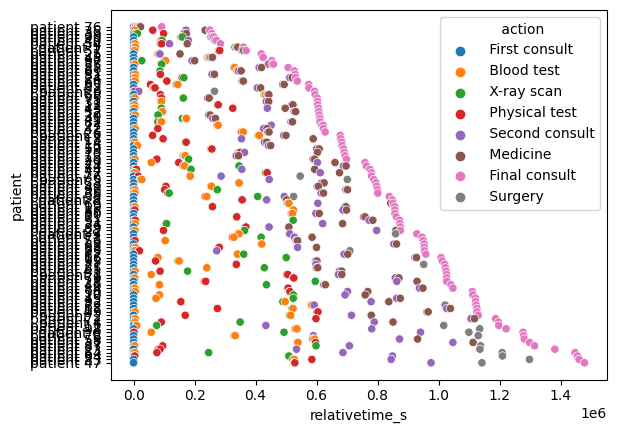

In [75]:
ordered = log_csv.sort_values(by=['caselength', 'patient', 'relativetime_s'])

sns.scatterplot(
    x=ordered['relativetime_s'], 
    y=ordered['patient'], 
    hue=ordered[' action'],
)

In [76]:
patient_events = pd.crosstab(log_csv['patient'], log_csv[' action'])
patient_events

action,Blood test,Final consult,First consult,Medicine,Physical test,Second consult,Surgery,X-ray scan
patient,,,,,,,,
patient 0,1,1,1,0,1,1,1,0
patient 1,1,1,1,1,1,1,0,1
patient 10,1,1,1,1,1,1,0,1
patient 11,1,1,1,0,1,1,1,1
patient 12,1,1,1,1,1,1,0,1
...,...,...,...,...,...,...,...,...
patient 95,1,1,1,0,1,1,1,0
patient 96,1,1,1,1,1,1,0,1
patient 97,1,1,1,1,1,1,0,1


In [77]:
len(log_csv['patient'].unique())

100

In [78]:
patient_events.sum()

 action
 Blood test        100
 Final consult     100
 First consult     100
 Medicine           80
 Physical test     100
 Second consult    100
 Surgery            20
 X-ray scan         90
dtype: int64

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, ' First consult'),
  Text(1, 0, ' Blood test'),
  Text(2, 0, ' Physical test'),
  Text(3, 0, ' Second consult'),
  Text(4, 0, ' Surgery'),
  Text(5, 0, ' Final consult'),
  Text(6, 0, ' X-ray scan'),
  Text(7, 0, ' Medicine')])

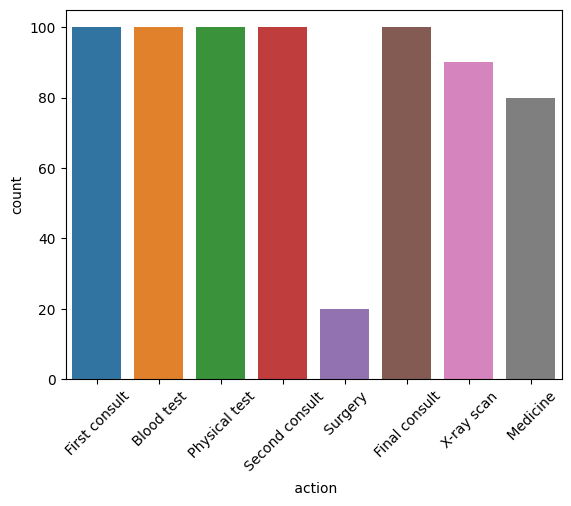

In [79]:
sns.countplot(x=log_csv[' action'])
plt.xticks(rotation=45)

In [80]:
patient_events.sum(axis=1)

patient
patient 0     6
patient 1     7
patient 10    7
patient 11    7
patient 12    7
             ..
patient 95    6
patient 96    7
patient 97    7
patient 98    7
patient 99    7
Length: 100, dtype: int64

In [81]:
log_csv.rename(columns=
               {' DateTime': 'time:timestamp',
                'patient': 'case:concept:name',
                ' action': 'concept:name',
                ' org:resource': 'org:resource'},
                inplace=True,
               )

log_csv

,case:concept:name,concept:name,org:resource,time:timestamp,caseend,casestart,relativetime,relativetime_s,relativedays,caselength
0,patient 0,First consult,Dr. Anna,2017-01-02 11:40:11,2017-01-09 08:29:28,2017-01-02 11:40:11,0 days 00:00:00,0,0,6 days 20:49:17
1,patient 0,Blood test,Lab,2017-01-02 12:47:33,2017-01-09 08:29:28,2017-01-02 11:40:11,0 days 01:07:22,4042,0,6 days 20:49:17
2,patient 0,Physical test,Nurse Jesse,2017-01-02 12:53:50,2017-01-09 08:29:28,2017-01-02 11:40:11,0 days 01:13:39,4419,0,6 days 20:49:17
3,patient 0,Second consult,Dr. Anna,2017-01-02 16:21:06,2017-01-09 08:29:28,2017-01-02 11:40:11,0 days 04:40:55,16855,0,6 days 20:49:17
4,patient 0,Surgery,Dr. Charlie,2017-01-05 13:23:09,2017-01-09 08:29:28,2017-01-02 11:40:11,3 days 01:42:58,265378,3,6 days 20:49:17
...,...,...,...,...,...,...,...,...,...,...
685,patient 99,X-ray scan,Team 2,2017-05-25 11:03:27,2017-05-31 12:46:43,2017-05-18 11:57:11,6 days 23:06:16,601576,6,13 days 00:49:32
686,patient 99,Physical test,Nurse Corey,2017-05-25 11:55:24,2017-05-31 12:46:43,2017-05-18 11:57:11,6 days 23:58:13,604693,6,13 days 00:49:32
687,patient 99,Second consult,Dr. Anna,2017-05-29 15:12:39,2017-05-31 12:46:43,2017-05-18 11:57:11,11 days 03:15:28,962128,11,13 days 00:49:32
688,patient 99,Medicine,Pharmacy,2017-05-29 16:17:13,2017-05-31 12:46:43,2017-05-18 11:57:11,11 days 04:20:02,966002,11,13 days 00:49:32


In [82]:
event_log = log_converter.apply(log_csv)

type(event_log)

pm4py.objects.log.obj.EventLog

In [83]:
event_log

[{'attributes': {'concept:name': 'patient 0'}, 'events': [{'concept:name': ' First consult', 'org:resource': ' Dr. Anna', 'time:timestamp': Timestamp('2017-01-02 11:40:11'), 'caseend': Timestamp('2017-01-09 08:29:28'), 'casestart': Timestamp('2017-01-02 11:40:11'), 'relativetime': Timedelta('0 days 00:00:00'), 'relativetime_s': 0, 'relativedays': 0, 'caselength': Timedelta('6 days 20:49:17')}, '..', {'concept:name': ' Final consult', 'org:resource': ' Dr. Ben', 'time:timestamp': Timestamp('2017-01-09 08:29:28'), 'caseend': Timestamp('2017-01-09 08:29:28'), 'casestart': Timestamp('2017-01-02 11:40:11'), 'relativetime': Timedelta('6 days 20:49:17'), 'relativetime_s': 593357, 'relativedays': 6, 'caselength': Timedelta('6 days 20:49:17')}]}, '....', {'attributes': {'concept:name': 'patient 99'}, 'events': [{'concept:name': ' First consult', 'org:resource': ' Dr. Bob', 'time:timestamp': Timestamp('2017-05-18 11:57:11'), 'caseend': Timestamp('2017-05-31 12:46:43'), 'casestart': Timestamp('20

In [84]:
log_csv.shape

(690, 10)

In [85]:
from pm4py.algo.filtering.log.attributes import attributes_filter

activities = attributes_filter.get_attribute_values(log_csv, "org:resource")
activities

{' Dr. Anna': 158,
 ' Lab': 100,
 ' Nurse Jesse': 57,
 ' Dr. Charlie': 5,
 ' Dr. Ben': 50,
 ' Team 1': 40,
 ' Pharmacy': 80,
 ' Team 2': 50,
 ' Nurse Corey': 43,
 ' Dr. Bob': 92,
 ' Dr. Rudy': 7,
 ' Dr. Alex': 5,
 ' Dr. Quinn': 3}

In [86]:
from pm4py.algo.filtering.log.attributes import attributes_filter

activities = attributes_filter.get_attribute_values(log_csv, "concept:name")
activities

{' First consult': 100,
 ' Blood test': 100,
 ' Physical test': 100,
 ' Second consult': 100,
 ' Surgery': 20,
 ' Final consult': 100,
 ' X-ray scan': 90,
 ' Medicine': 80}

In [87]:
from pm4py.algo.filtering.log.variants import variants_filter
from pm4py.statistics.traces.generic.log import case_statistics

variants = variants_filter.get_variants(event_log)
print(
    f"У нас есть: {len(variants)} различных вариантов путей \
        в нашем журнале событий"
)

У нас есть: 15 различных вариантов путей         в нашем журнале событий


In [88]:
variants_count = case_statistics.get_variant_statistics(log_csv)

variants_count

[{'variant': (' First consult',
   ' Blood test',
   ' X-ray scan',
   ' Physical test',
   ' Second consult',
   ' Medicine',
   ' Final consult'),
  'count': 18},
 {'variant': (' First consult',
   ' Blood test',
   ' Physical test',
   ' X-ray scan',
   ' Second consult',
   ' Medicine',
   ' Final consult'),
  'count': 14},
 {'variant': (' First consult',
   ' X-ray scan',
   ' Physical test',
   ' Blood test',
   ' Second consult',
   ' Medicine',
   ' Final consult'),
  'count': 12},
 {'variant': (' First consult',
   ' Physical test',
   ' X-ray scan',
   ' Blood test',
   ' Second consult',
   ' Medicine',
   ' Final consult'),
  'count': 11},
 {'variant': (' First consult',
   ' Physical test',
   ' Blood test',
   ' X-ray scan',
   ' Second consult',
   ' Medicine',
   ' Final consult'),
  'count': 10},
 {'variant': (' First consult',
   ' X-ray scan',
   ' Blood test',
   ' Physical test',
   ' Second consult',
   ' Medicine',
   ' Final consult'),
  'count': 9},
 {'variant'

In [89]:
from pm4py.algo.discovery.alpha import algorithm as alpha_miner

net, initial_marking, final_marking = alpha_miner.apply(event_log)

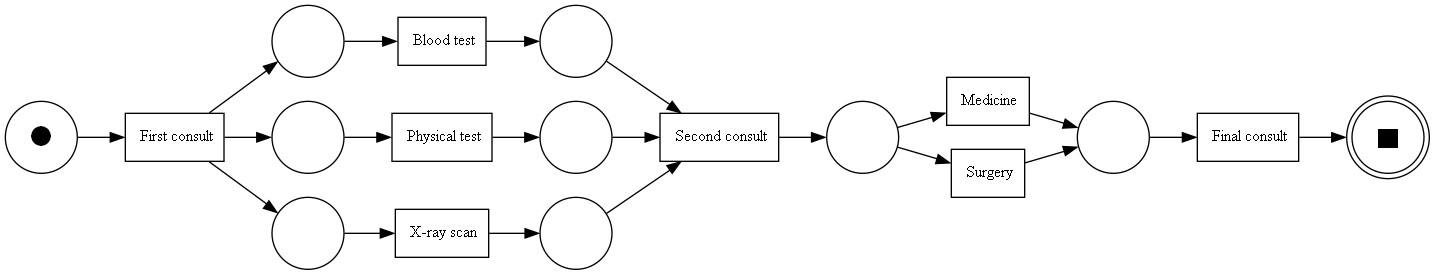

In [90]:
from pm4py.visualization.petri_net import visualizer as pn_visualizer

gviz = pn_visualizer.apply(net, initial_marking, final_marking)

pn_visualizer.view(gviz)

replaying log with TBR, completed variants :: 100%|██████████| 15/15 [00:00<00:00, 4998.38it/s]


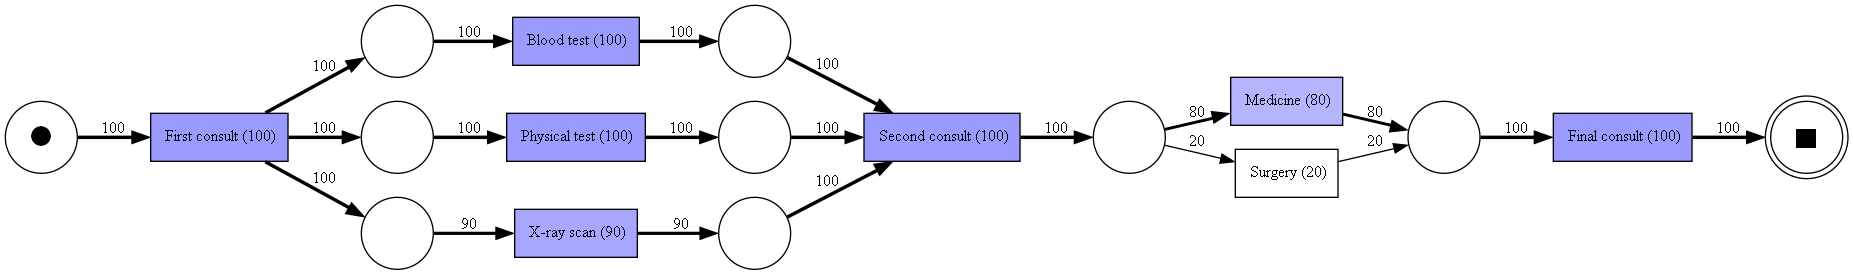

In [91]:
parameters = {pn_visualizer.Variants.FREQUENCY.value.Parameters.FORMAT: "png"}

gviz = pn_visualizer.apply(net, initial_marking,
                           final_marking,
                           parameters=parameters,
                           variant=pn_visualizer.Variants.FREQUENCY,
                           log=event_log)

pn_visualizer.view(gviz)

In [92]:
pn_visualizer.save(gviz, "alpha_miner_lab.png")

In [93]:
from pm4py.visualization.petri_net.util import performance_map

traces = performance_map.get_transition_performance_with_token_replay(
    event_log,
    net,
    initial_marking,
    final_marking,
)

replaying log with TBR, completed variants :: 100%|██████████| 15/15 [00:00<00:00, 7507.70it/s]


In [94]:
traces.keys()

dict_keys(["( First consult, ' First consult')", "( Physical test, ' Physical test')", "( X-ray scan, ' X-ray scan')", "( Blood test, ' Blood test')", "( Second consult, ' Second consult')", "( Medicine, ' Medicine')", "( Surgery, ' Surgery')", "( Final consult, ' Final consult')"])

In [95]:
log_csv[log_csv['case:concept:name'] == 'patient 13']

,case:concept:name,concept:name,org:resource,time:timestamp,caseend,casestart,relativetime,relativetime_s,relativedays,caselength
89,patient 13,First consult,Dr. Bob,2017-01-23 15:09:10,2017-01-31 15:49:44,2017-01-23 15:09:10,0 days 00:00:00,0,0,8 days 00:40:34
90,patient 13,X-ray scan,Team 2,2017-01-25 12:29:05,2017-01-31 15:49:44,2017-01-23 15:09:10,1 days 21:19:55,163195,1,8 days 00:40:34
91,patient 13,Physical test,Nurse Jesse,2017-01-25 13:34:31,2017-01-31 15:49:44,2017-01-23 15:09:10,1 days 22:25:21,167121,1,8 days 00:40:34
92,patient 13,Blood test,Lab,2017-01-25 14:25:04,2017-01-31 15:49:44,2017-01-23 15:09:10,1 days 23:15:54,170154,1,8 days 00:40:34
93,patient 13,Second consult,Dr. Anna,2017-01-27 12:37:29,2017-01-31 15:49:44,2017-01-23 15:09:10,3 days 21:28:19,336499,3,8 days 00:40:34
94,patient 13,Medicine,Pharmacy,2017-01-27 14:47:02,2017-01-31 15:49:44,2017-01-23 15:09:10,3 days 23:37:52,344272,3,8 days 00:40:34
95,patient 13,Final consult,Dr. Ben,2017-01-31 15:49:44,2017-01-31 15:49:44,2017-01-23 15:09:10,8 days 00:40:34,693634,8,8 days 00:40:34


<Axes: xlabel='time:timestamp', ylabel='org:resource'>

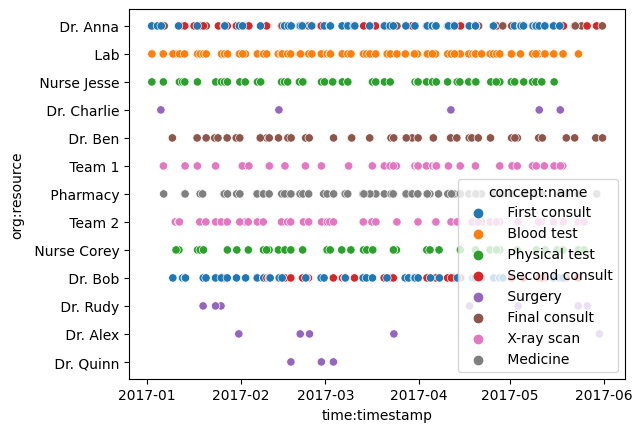

In [96]:
sns.scatterplot(
    x=log_csv['time:timestamp'], 
    y=log_csv['org:resource'], 
    hue=log_csv['concept:name'],
)

1. Каково минимальное и максимальное количество событий в одном случае?

In [97]:
concept_ordered = log_csv.groupby('case:concept:name').count()['concept:name']
min_event_count = min(concept_ordered)
max_event_count = max(concept_ordered)

concept_ordered

case:concept:name
patient 0     6
patient 1     7
patient 10    7
patient 11    7
patient 12    7
             ..
patient 95    6
patient 96    7
patient 97    7
patient 98    7
patient 99    7
Name: concept:name, Length: 100, dtype: int64

In [98]:
print(f"Минимальное количество событий в одном случае: {min_event_count}\n\
Максимальное количество событий в одном случае: {max_event_count}")

Минимальное количество событий в одном случае: 6
Максимальное количество событий в одном случае: 7


2. Какие события являются общими для всех процессов?

In [99]:
patient_events

action,Blood test,Final consult,First consult,Medicine,Physical test,Second consult,Surgery,X-ray scan
patient,,,,,,,,
patient 0,1,1,1,0,1,1,1,0
patient 1,1,1,1,1,1,1,0,1
patient 10,1,1,1,1,1,1,0,1
patient 11,1,1,1,0,1,1,1,1
patient 12,1,1,1,1,1,1,0,1
...,...,...,...,...,...,...,...,...
patient 95,1,1,1,0,1,1,1,0
patient 96,1,1,1,1,1,1,0,1
patient 97,1,1,1,1,1,1,0,1


In [100]:
print("Общие события для всех случаев:")
for col in patient_events.columns.values:
    if (patient_events[col] == 1).all():
        print(f"\t{col}")

Общие события для всех случаев:
	 Blood test
	 Final consult
	 First consult
	 Physical test
	 Second consult


3. Найдите наиболее часто встречающуюся последовательность событий

In [101]:
counts = [var['count'] for var in variants_count]
counts

[18, 14, 12, 11, 10, 9, 4, 4, 3, 3, 3, 3, 2, 2, 2]

In [102]:
counts = [var['count'] for var in variants_count]
vars = [var['variant'] for var in variants_count]
min_freq = counts[-1]
max_freq = counts[0]

print(f"Наименее часто встречающиеся последовательности: ")
for i in range(len(counts)):
    if counts[i] == min_freq:
        print(vars[i])

print(f"Наиболее часто встречающиеся последовательности: ")
for i in range(len(counts)):
    if counts[i] == max_freq:
        print(vars[i])

Наименее часто встречающиеся последовательности: 
(' First consult', ' X-ray scan', ' Physical test', ' Blood test', ' Second consult', ' Surgery', ' Final consult')
(' First consult', ' Physical test', ' Blood test', ' Second consult', ' Surgery', ' Final consult')
(' First consult', ' Blood test', ' Physical test', ' Second consult', ' Surgery', ' Final consult')
Наиболее часто встречающиеся последовательности: 
(' First consult', ' Blood test', ' X-ray scan', ' Physical test', ' Second consult', ' Medicine', ' Final consult')


4. Какой пациент на лечение тратил меньше всего времени, а какой больше?

In [103]:
case_starts_ends['case_duration'] = case_starts_ends['caseend'] - \
                                                case_starts_ends['casestart']

case_starts_ends

,patient,caseend,casestart,case_duration
0,patient 0,2017-01-09 08:29:28,2017-01-02 11:40:11,6 days 20:49:17
1,patient 1,2017-01-06 16:49:21,2017-01-02 12:50:35,4 days 03:58:46
2,patient 10,2017-01-30 11:19:19,2017-01-17 14:13:17,12 days 21:06:02
3,patient 11,2017-02-02 10:13:13,2017-01-19 13:35:20,13 days 20:37:53
4,patient 12,2017-01-27 11:18:57,2017-01-20 11:43:38,6 days 23:35:19
...,...,...,...,...
95,patient 95,2017-05-26 10:19:34,2017-05-15 09:15:08,11 days 01:04:26
96,patient 96,2017-05-24 16:38:21,2017-05-15 10:31:45,9 days 06:06:36
97,patient 97,2017-05-22 14:37:56,2017-05-17 08:44:01,5 days 05:53:55
98,patient 98,2017-05-31 14:16:13,2017-05-17 10:56:48,14 days 03:19:25


In [104]:
min_time = min(case_starts_ends['case_duration'])
min_patient = \
    case_starts_ends[case_starts_ends['case_duration'] == min_time]['patient']

max_time = max(case_starts_ends['case_duration'])
max_patient = \
    case_starts_ends[case_starts_ends['case_duration'] == max_time]['patient']

In [105]:
print(f"Больше всего времени на лечение потратил \
{max_patient.values[0]}: {max_time.days} дней \
{max_time.seconds // 3600} часов \
{(max_time.seconds // 60) % 60} минут \n\n\
Меньше всего времени на лечение \
потратил {min_patient.values[0]}: {min_time.days} дней \
{min_time.seconds // 3600} часов \
{(min_time.seconds // 60) % 60} минут"
)

Больше всего времени на лечение потратил patient 47: 17 дней 2 часов 43 минут 

Меньше всего времени на лечение потратил patient 76: 1 дней 1 часов 34 минут


5. Создать в DataFrame новую колонку, в которой будет записано количество событий для данного процесса

In [106]:
log_csv['NumActions in Case'] = \
    log_csv.groupby('case:concept:name').cumcount() + 1

log_csv

,case:concept:name,concept:name,org:resource,time:timestamp,caseend,casestart,relativetime,relativetime_s,relativedays,caselength,NumActions in Case
0,patient 0,First consult,Dr. Anna,2017-01-02 11:40:11,2017-01-09 08:29:28,2017-01-02 11:40:11,0 days 00:00:00,0,0,6 days 20:49:17,1
1,patient 0,Blood test,Lab,2017-01-02 12:47:33,2017-01-09 08:29:28,2017-01-02 11:40:11,0 days 01:07:22,4042,0,6 days 20:49:17,2
2,patient 0,Physical test,Nurse Jesse,2017-01-02 12:53:50,2017-01-09 08:29:28,2017-01-02 11:40:11,0 days 01:13:39,4419,0,6 days 20:49:17,3
3,patient 0,Second consult,Dr. Anna,2017-01-02 16:21:06,2017-01-09 08:29:28,2017-01-02 11:40:11,0 days 04:40:55,16855,0,6 days 20:49:17,4
4,patient 0,Surgery,Dr. Charlie,2017-01-05 13:23:09,2017-01-09 08:29:28,2017-01-02 11:40:11,3 days 01:42:58,265378,3,6 days 20:49:17,5
...,...,...,...,...,...,...,...,...,...,...,...
685,patient 99,X-ray scan,Team 2,2017-05-25 11:03:27,2017-05-31 12:46:43,2017-05-18 11:57:11,6 days 23:06:16,601576,6,13 days 00:49:32,3
686,patient 99,Physical test,Nurse Corey,2017-05-25 11:55:24,2017-05-31 12:46:43,2017-05-18 11:57:11,6 days 23:58:13,604693,6,13 days 00:49:32,4
687,patient 99,Second consult,Dr. Anna,2017-05-29 15:12:39,2017-05-31 12:46:43,2017-05-18 11:57:11,11 days 03:15:28,962128,11,13 days 00:49:32,5
688,patient 99,Medicine,Pharmacy,2017-05-29 16:17:13,2017-05-31 12:46:43,2017-05-18 11:57:11,11 days 04:20:02,966002,11,13 days 00:49:32,6


6. Patient 13 с каким врачом/врачами он/она консультировался?

In [107]:
print(f"Patient 13 консультировался со следующими врачами: \
{log_csv[log_csv['case:concept:name'] == 'patient 13']['org:resource'].values}")

Patient 13 консультировался со следующими врачами: [' Dr. Bob' ' Team 2' ' Nurse Jesse' ' Lab' ' Dr. Anna' ' Pharmacy'
 ' Dr. Ben']


7. Какое событие является наиболее ресурсоёмким в данном журнале событий?

In [108]:
log_csv['diff'] = log_csv.groupby('case:concept:name')['time:timestamp'].diff(1)
log_csv['time'] = log_csv.groupby('case:concept:name')['diff'].shift(-1)
log_csv.drop('diff', axis=1, inplace=True)

pd.pivot_table(log_csv,
               index=["concept:name", "org:resource"],
               values=["time"],
               aggfunc=np.sum)

time
concept:name    org:resource                  
 Blood test      Lab         201 days 09:17:03
 Final consult   Dr. Anna      0 days 00:00:00
                 Dr. Ben       0 days 00:00:00
 First consult   Dr. Anna     69 days 07:46:45
                 Dr. Bob      85 days 08:23:39
 Medicine        Pharmacy    171 days 03:07:31
 Physical test   Nurse Corey  76 days 13:52:01
                 Nurse Jesse  93 days 03:03:55
 Second consult  Dr. Anna     57 days 17:50:57
                 Dr. Bob      51 days 02:00:11
 Surgery         Dr. Alex     13 days 10:53:25
                 Dr. Charlie   9 days 16:55:36
                 Dr. Quinn     2 days 19:43:52
                 Dr. Rudy     14 days 01:08:09
 X-ray scan      Team 1       52 days 14:33:43
                 Team 2       59 days 08:17:17

В процессе Surgery было задействовано 4 врача

8. Есть ли врачи или медсестры, которые перегружены работой?

In [109]:
activities = attributes_filter.get_attribute_values(log_csv, "org:resource")
activities

{' Dr. Anna': 158,
 ' Lab': 100,
 ' Nurse Jesse': 57,
 ' Dr. Charlie': 5,
 ' Dr. Ben': 50,
 ' Team 1': 40,
 ' Pharmacy': 80,
 ' Team 2': 50,
 ' Nurse Corey': 43,
 ' Dr. Bob': 92,
 ' Dr. Rudy': 7,
 ' Dr. Alex': 5,
 ' Dr. Quinn': 3}

In [110]:
resource_grouped = log_csv.groupby('org:resource').agg({'caselength': 'sum'})

result = resource_grouped.nlargest(len(activities), 'caselength')
result

,caselength
org:resource,
Dr. Anna,1549 days 23:50:20
Lab,957 days 16:54:04
Dr. Bob,867 days 09:46:35
Pharmacy,709 days 14:35:09
Nurse Jesse,538 days 23:48:42
Team 2,499 days 06:12:54
Dr. Ben,455 days 17:05:17
Nurse Corey,418 days 17:05:22
Team 1,383 days 21:59:56


In [111]:
mean_consult = sum(activities.values()) / len(activities)

deviations = [int(val - mean_consult) for val in activities.values()]

deviations

[104, 46, 3, -48, -3, -13, 26, -3, -10, 38, -46, -48, -50]

Видно, что врачи 'Dr. Anna', 'Dr. bob' сильно перерабатывают относительно других

9. Какие мероприятия (actions) непропорционально отнимают время у некоторых врачей и медсестер? Каково распределение событий среди врачей и медсестер?

10. Какие события связаны с узкими местами и какие ресурсы задействованы?

In [112]:
pd.pivot_table(
    log_csv,
    index=["concept:name", "org:resource"],
    values=["time"],
    aggfunc=np.sum,
)

time
concept:name    org:resource                  
 Blood test      Lab         201 days 09:17:03
 Final consult   Dr. Anna      0 days 00:00:00
                 Dr. Ben       0 days 00:00:00
 First consult   Dr. Anna     69 days 07:46:45
                 Dr. Bob      85 days 08:23:39
 Medicine        Pharmacy    171 days 03:07:31
 Physical test   Nurse Corey  76 days 13:52:01
                 Nurse Jesse  93 days 03:03:55
 Second consult  Dr. Anna     57 days 17:50:57
                 Dr. Bob      51 days 02:00:11
 Surgery         Dr. Alex     13 days 10:53:25
                 Dr. Charlie   9 days 16:55:36
                 Dr. Quinn     2 days 19:43:52
                 Dr. Rudy     14 days 01:08:09
 X-ray scan      Team 1       52 days 14:33:43
                 Team 2       59 days 08:17:17

Узкое место - Blood test и Medicine

11. Постройте график распределения времени между первой консультацией и следующим действием пациента. Каково среднее время между первой консультацией и следующим шагом лечения? Каково максимальное и минимальное время?

In [113]:
from pm4py.objects.petri_net.utils.performance_map import mean
import pm4py

tracefilter_log_pos = pm4py.filter_event_attribute_values(
    log_csv, 
    "NumActions in Case", 
    [2], 
    level="event", 
    retain=True,
)

mean_time = mean(tracefilter_log_pos['relativetime_s'])
mean_hour = mean_time // 3600
mean_minutes = (mean_time // 60) % 60

max_time = max(tracefilter_log_pos['relativetime_s'])
max_hour = max_time // 3600
max_minutes = (max_time // 60) % 60

min_time = min(tracefilter_log_pos['relativetime_s'])
min_hour = min_time // 3600
min_minutes = (min_time // 60) % 60

print(f"Среднее время между первой консультацией и следующим шагом лечения: {mean_hour} часов {mean_minutes} минут")
print(f"Максимальное время: {max_hour} часов {max_minutes} минут")
print(f"Минимальное время: {min_hour} часов {min_minutes} минут")

Среднее время между первой консультацией и следующим шагом лечения: 37.0 часов 7.0 минут
Максимальное время: 163 часов 5 минут
Минимальное время: 0 часов 22 минут


12. Используя библиотеки PM4PY и networkx, создайте граф социальных связей по данному журналу событий, используя метрику SNA.

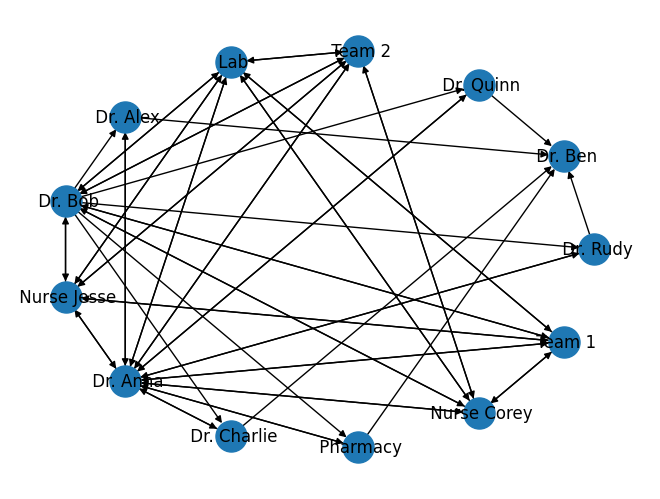

In [114]:
from pm4py import discover_handover_of_work_network, view_sna

values = discover_handover_of_work_network(log_csv)
view_sna(values, variant_str='networkx')
plt.show()

In [115]:
from pm4py.algo.discovery.inductive import algorithm as inductive_miner
from pm4py.visualization.process_tree import visualizer as pt_visualizer
from pm4py.convert import convert_to_petri_net as pt_converter

tree = inductive_miner.apply(event_log)

net, initial_marking, final_marking = pt_converter(tree)

replaying log with TBR, completed variants :: 100%|██████████| 15/15 [00:00<00:00, 5000.36it/s]


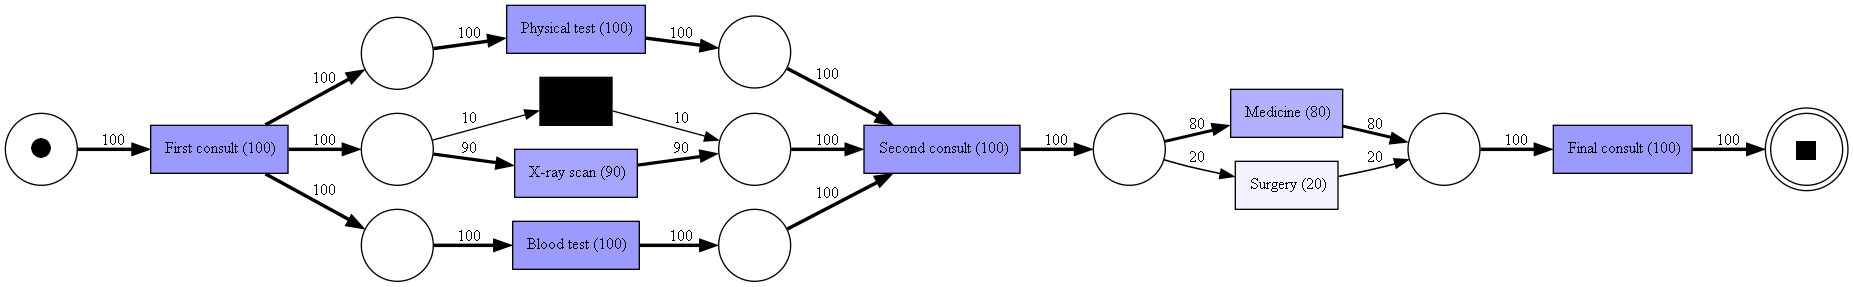

In [116]:
parameters = {pn_visualizer.Variants.FREQUENCY.value.Parameters.FORMAT: "png"}

gviz = pn_visualizer.apply(
    net, 
    initial_marking, 
    final_marking,
    parameters=parameters,
    variant=pn_visualizer.Variants.FREQUENCY,
    log=event_log,
)
pn_visualizer.view(gviz)

In [117]:
from pm4py.algo.evaluation.simplicity import algorithm as simplicity_evaluator
from pm4py.algo.evaluation.replay_fitness import algorithm as replay_fitness_evaluator
from pm4py.algo.evaluation.precision import algorithm as precision_evaluator
from pm4py.algo.evaluation.generalization import algorithm as generalization_evaluator

simplicity = simplicity_evaluator.apply(net)
print(f"Простота равна: {simplicity}\n")

fitness = replay_fitness_evaluator.apply(
    event_log, 
    net, 
    initial_marking, 
    final_marking, 
    variant=replay_fitness_evaluator.Variants.TOKEN_BASED,
)
print(f"Пригодность воспроизведения, используя метод на основе токенов, равна {fitness}\n")

prec = precision_evaluator.apply(
    event_log, 
    net, 
    initial_marking, 
    final_marking, 
    variant=precision_evaluator.Variants.ETCONFORMANCE_TOKEN,
)
print(f"\nТочность с помощью метода ETConformance равна {prec}\n")

gen = generalization_evaluator.apply(
    event_log, 
    net, initial_marking, 
    final_marking,
)
print(f"\nОбобщение равно {prec}\n")

Простота равна: 0.7599999999999999



replaying log with TBR, completed variants :: 100%|██████████| 15/15 [00:00<00:00, 7501.44it/s]


Пригодность воспроизведения, используя метод на основе токенов, равна {'perc_fit_traces': 100.0, 'average_trace_fitness': 1.0, 'log_fitness': 1.0, 'percentage_of_fitting_traces': 100.0}



replaying log with TBR, completed variants :: 100%|██████████| 39/39 [00:00<00:00, 7798.71it/s]



Точность с помощью метода ETConformance равна 0.9840848806366048



replaying log with TBR, completed variants :: 100%|██████████| 15/15 [00:00<00:00, 7434.95it/s]


Обобщение равно 0.9840848806366048



In [118]:
from pm4py.algo.discovery.heuristics import algorithm as heuristics_miner
parameters = {pn_visualizer.Variants.FREQUENCY.value.Parameters.FORMAT: "png"}

net, initial_marking, final_marking = heuristics_miner.apply(event_log)

replaying log with TBR, completed variants :: 100%|██████████| 15/15 [00:00<00:00, 4999.97it/s]


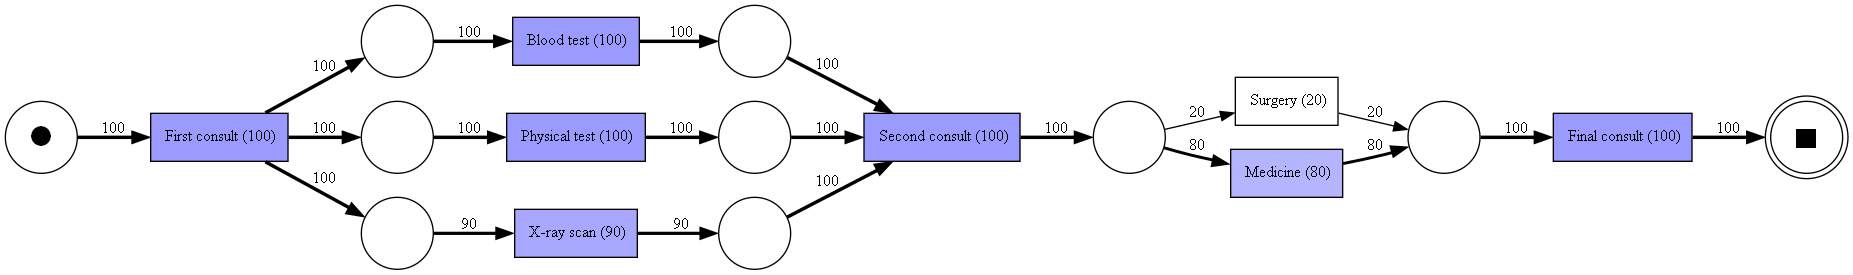

In [119]:
gviz = pn_visualizer.apply(
    net, 
    initial_marking, 
    final_marking,
    parameters=parameters,
    variant=pn_visualizer.Variants.FREQUENCY,
    log=event_log,
)
pn_visualizer.view(gviz)

In [120]:
simplicity = simplicity_evaluator.apply(net)
print(f"Простота равна: {simplicity}\n")

fitness = replay_fitness_evaluator.apply(
    event_log, 
    net, 
    initial_marking, 
    final_marking, 
    variant=replay_fitness_evaluator.Variants.TOKEN_BASED,
)
print(f"Пригодность воспроизведения, используя метод на основе токенов, равна {fitness}\n")

prec = precision_evaluator.apply(
    event_log, 
    net, 
    initial_marking, 
    final_marking, 
    variant=precision_evaluator.Variants.ETCONFORMANCE_TOKEN,
)
print(f"\nТочность с помощью метода ETConformance равна {prec}\n")

gen = generalization_evaluator.apply(
    event_log, 
    net, initial_marking, 
    final_marking,
)
print(f"\nОбобщение равно {prec}\n")

Простота равна: 0.8181818181818181



replaying log with TBR, completed variants :: 100%|██████████| 15/15 [00:00<00:00, 4999.57it/s]


Пригодность воспроизведения, используя метод на основе токенов, равна {'perc_fit_traces': 90.0, 'average_trace_fitness': 0.9888888888888888, 'log_fitness': 0.98989898989899, 'percentage_of_fitting_traces': 90.0}



replaying log with TBR, completed variants :: 100%|██████████| 39/39 [00:00<00:00, 7773.50it/s]



Точность с помощью метода ETConformance равна 0.9830188679245283



replaying log with TBR, completed variants :: 100%|██████████| 15/15 [00:00<00:00, 7545.52it/s]


Обобщение равно 0.9830188679245283



In [121]:
from pm4py.algo.discovery.alpha import algorithm as alpha_miner
parameters = {pn_visualizer.Variants.FREQUENCY.value.Parameters.FORMAT: "png"}

net, initial_marking, final_marking = alpha_miner.apply(event_log)

replaying log with TBR, completed variants :: 100%|██████████| 15/15 [00:00<00:00, 4974.66it/s]


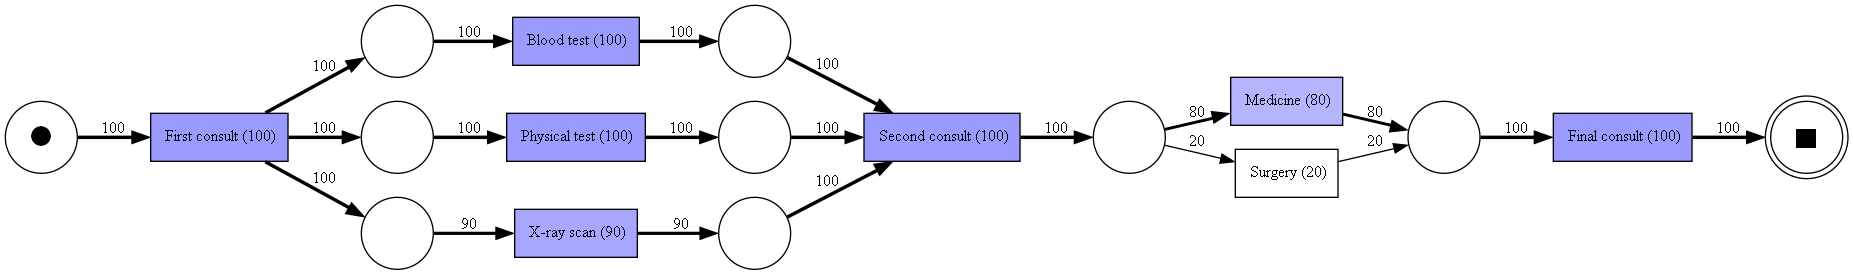

In [122]:
gviz = pn_visualizer.apply(
    net, 
    initial_marking, 
    final_marking,
    parameters=parameters,
    variant=pn_visualizer.Variants.FREQUENCY,
    log=event_log,
)
pn_visualizer.view(gviz)

In [123]:
simplicity = simplicity_evaluator.apply(net)
print(f"Простота равна: {simplicity}\n")

fitness = replay_fitness_evaluator.apply(
    event_log, 
    net, 
    initial_marking, 
    final_marking, 
    variant=replay_fitness_evaluator.Variants.TOKEN_BASED,
)
print(f"Пригодность воспроизведения, используя метод на основе токенов, равна {fitness}\n")

prec = precision_evaluator.apply(
    event_log, 
    net, 
    initial_marking, 
    final_marking, 
    variant=precision_evaluator.Variants.ETCONFORMANCE_TOKEN,
)
print(f"\nТочность с помощью метода ETConformance равна {prec}\n")

gen = generalization_evaluator.apply(
    event_log, 
    net, initial_marking, 
    final_marking,
)
print(f"\nОбобщение равно {prec}\n")

Простота равна: 0.8181818181818181



replaying log with TBR, completed variants :: 100%|██████████| 15/15 [00:00<00:00, 7498.76it/s]


Пригодность воспроизведения, используя метод на основе токенов, равна {'perc_fit_traces': 90.0, 'average_trace_fitness': 0.9888888888888888, 'log_fitness': 0.98989898989899, 'percentage_of_fitting_traces': 90.0}



replaying log with TBR, completed variants :: 100%|██████████| 39/39 [00:00<00:00, 8217.10it/s]



Точность с помощью метода ETConformance равна 0.9830188679245283



replaying log with TBR, completed variants :: 100%|██████████| 15/15 [00:00<00:00, 4973.48it/s]


Обобщение равно 0.9830188679245283



In [124]:
from pm4py.algo.discovery.dfg import algorithm as dfg_graph
from pm4py.objects.conversion.dfg import converter as dfg_mining
parameters = {pn_visualizer.Variants.FREQUENCY.value.Parameters.FORMAT: "png"}

dfg = dfg_graph.apply(event_log)
net, initial_marking, final_marking = dfg_mining.apply(dfg)

replaying log with TBR, completed variants :: 100%|██████████| 15/15 [00:00<00:00, 5959.51it/s]


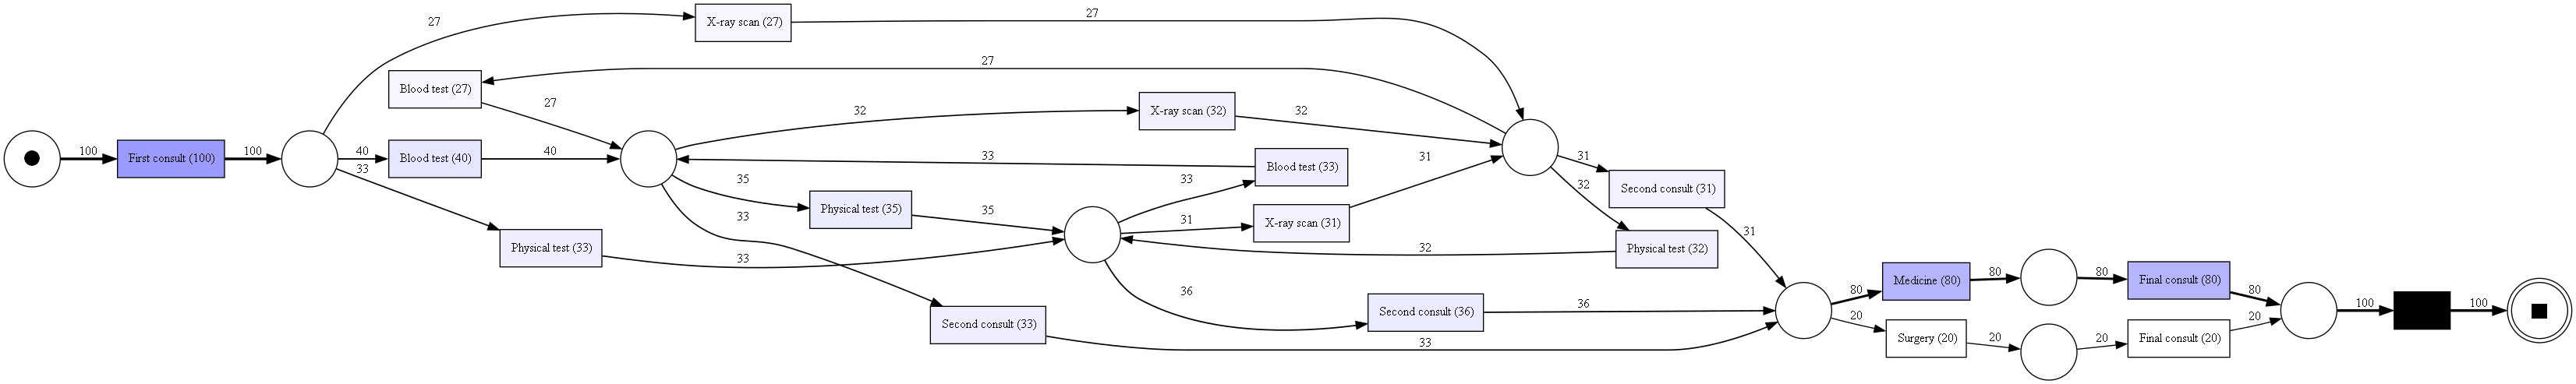

In [125]:
gviz = pn_visualizer.apply(
    net,
    initial_marking,
    final_marking, 
    parameters=parameters,
    log=event_log, 
    variant=pn_visualizer.Variants.FREQUENCY,
)
pn_visualizer.view(gviz)

In [126]:
simplicity = simplicity_evaluator.apply(net)
print(f"Простота равна: {simplicity}\n")

fitness = replay_fitness_evaluator.apply(
    event_log, 
    net, 
    initial_marking, 
    final_marking, 
    variant=replay_fitness_evaluator.Variants.TOKEN_BASED,
)
print(f"Пригодность воспроизведения, используя метод на основе токенов, равна {fitness}\n")

prec = precision_evaluator.apply(
    event_log, 
    net, 
    initial_marking, 
    final_marking, 
    variant=precision_evaluator.Variants.ETCONFORMANCE_TOKEN,
)
print(f"\nТочность с помощью метода ETConformance равна {prec}\n")

gen = generalization_evaluator.apply(
    event_log, 
    net, initial_marking, 
    final_marking,
)
print(f"\nОбобщение равно {prec}\n")

Простота равна: 0.6363636363636362



replaying log with TBR, completed variants :: 100%|██████████| 15/15 [00:00<00:00, 5002.35it/s]


Пригодность воспроизведения, используя метод на основе токенов, равна {'perc_fit_traces': 100.0, 'average_trace_fitness': 1.0, 'log_fitness': 1.0, 'percentage_of_fitting_traces': 100.0}



replaying log with TBR, completed variants :: 100%|██████████| 39/39 [00:00<00:00, 8112.37it/s]



Точность с помощью метода ETConformance равна 0.7089171974522293



replaying log with TBR, completed variants :: 100%|██████████| 15/15 [00:00<00:00, 4998.38it/s]


Обобщение равно 0.7089171974522293



Модели за исключением DFG-Graph показали себя хорошо и примерно одинаково